In [ ]:
#Required packages:
#pip install snscrape
#!pip install textblob
#pip install WordCloud
#!pip install whatthelang
#!pip install -U setuptools
#!pip install auto-py-to-exe

# 1. Import required packages

In [46]:
#Get query:
import snscrape.modules.twitter as sntwitter

#Numpy and Pandas
import numpy as np
import pandas as pd
from collections import Counter

# Datetime
from datetime import date
from datetime import datetime

#Sentiment Anaysis:
import snscrape.modules.twitter as sntwitter

#Getting files
import glob
import os

#WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from wordcloud import WordCloud, STOPWORDS

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#NLTK packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

import string
from textblob import Word, TextBlob
from textstat.textstat import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS

#Warning error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Authenticate to Twitter and getting tweets

In [2]:
#Query to extract twitter data

#query = "(#farmersprotest) lang:en until:2021-12-31 since:2019-01-01"
#tweets = []
#limit = 100


#for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    #if len(tweets) == limit:
     #   break
    #else:
        #tweets.append([tweet.date, tweet.user.username, tweet.content])
        
#df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
#print(df)


Notes: Twitter data was extracted on 10 timelines inorder to have a meticulous study of the research paper

In [3]:
#Merging all the files
tweets_Sep20 = pd.read_csv("tweets_Sep20.csv")
tweets_OCt_Nov_20 = pd.read_csv("tweets_OCt_Nov_20.csv")
tweets_Dec_20_Jan_21 = pd.read_csv("tweets_Dec_20_Jan_21.csv")
tweets_Jan_21_Mar_21 = pd.read_csv("tweets_Jan_21_Mar_21.csv")
tweets_Apr_21_May_21 = pd.read_csv("tweets_Apr_21_May_21.csv")
tweets_Jun_21_Jul_21 = pd.read_csv("tweets_Jun_21_Jul_21.csv")
tweetsAug_21_Sep_21 = pd.read_csv('tweetsAug_21_Sep_21.csv',encoding='latin1') #file name change here
tweets_Oct21 = pd.read_csv("tweets_Oct21.csv")
tweets_Nov21 = pd.read_csv("tweets_Nov21.csv")
tweets_Dec21 = pd.read_csv("tweets_Dec21.csv")

frames = [tweets_Sep20, tweets_OCt_Nov_20,tweets_Dec_20_Jan_21,tweets_Jan_21_Mar_21,tweets_Apr_21_May_21,tweets_Jun_21_Jul_21,tweetsAug_21_Sep_21,tweets_Oct21,tweets_Nov21,tweets_Dec21]
tweet_data =pd.concat(frames)

In [4]:
print(tweet_data.shape)

(572005, 3)


Notes: The extracted twitter data has 572005 tweets in total with respect to the hashtag - #farmersprotest

In [5]:
tweet_data.head(2)

,Unnamed: 0,Date,Tweet
0,0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ..."
1,1,2020-09-29 21:13:30+00:00,people talking about #SuhanaKhan reaction to t...


In [6]:
#Removing unnamed column:
tweet_data = tweet_data.loc[:, ~tweet_data.columns.str.contains('^Unnamed')]

In [7]:
#Checking the data type of the variable
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572005 entries, 0 to 10534
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    572005 non-null  object
 1   Tweet   572005 non-null  object
dtypes: object(2)
memory usage: 13.1+ MB


In [8]:
#Changing the Date variable to datetime
tweet_data['New_Date'] = pd.to_datetime(tweet_data['Date']).dt.date

In [9]:
#Changing the data type for date from object to date type
tweet_data['Date'] = pd.to_datetime(tweet_data['Date'])
tweet_data['New_Date'] = pd.to_datetime(tweet_data['New_Date'])

In [10]:
#Changing the data type for Tweet from object to str 
tweet_data['Tweet'].astype(str)

0        @amitvarma Amit, You have spent many episodes ...
1        people talking about #SuhanaKhan reaction to t...
2        CNN: TRUMP is bankrupt, owes $421,000,000 to I...
3        Because that's what sets a new disappointment ...
4        3 ball(bill)... 3 strikes!!!... Farmers out \n...
                               ...                        
10530    Rihanna done more for my people than the Queen...
10531    #Pricehike \n#unemployment \n#migrantcrisis\n#...
10532    What emergency, in the midst of a #pandemic, n...
10533    @AmandaCerny @Kisanektamorcha Thanks Amanda 🙏🏼...
10534    People, stop spreading rumours no one is leavi...
Name: Tweet, Length: 572005, dtype: object

# 3. Data Cleaning

In [12]:
#Remove url and links
tweet_data["Clean_Tweet"] = tweet_data["Tweet"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet
0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,"@amitvarma Amit, You have spent many episodes ..."


In [13]:
# Remove punctuations
tweet_data["Clean_Tweet"]= tweet_data["Clean_Tweet"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...@#_*]", " ", s).split()))
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet
0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma Amit You have spent many episodes ta...


In [14]:
# Remove numbers
tweet_data["Clean_Tweet"].replace('d+', '', regex=True, inplace=True)
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet
0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma Amit You have spent many episoes tal...


In [15]:
# Remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
tweet_data["Clean_Tweet"] = tweet_data["Clean_Tweet"].apply(lambda s: deEmojify(s))
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet
0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma Amit You have spent many episoes tal...


In [16]:
# Remove stop words
stop = set(stopwords.words('english'))

def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

tweet_data["Clean_Tweet"] = tweet_data["Clean_Tweet"].apply(lambda s: rem_en(s))
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet
0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma amit spent many episoes talking e-re...


Note: The tweets are cleaned using pre-processing steps used in NLP. Now clean data is avaiable for further analysis of data

# 4. Calculate Sentiment

In [23]:
#Updating sentiments for each tweets using SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

tweet_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweet_data["Tweet"]]
tweet_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweet_data["Tweet"]]
tweet_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweet_data["Tweet"]]
tweet_data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in tweet_data["Tweet"]]

tweet_data.head(2)

,Date,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound
0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma amit spent many episoes talking e-re...,0.271591,Positive,0.000,0.040,0.960,-0.2023
1,2020-09-29 21:13:30+00:00,people talking about #SuhanaKhan reaction to t...,2020-09-29,people talking suhanakhan reaction calling ugl...,0.054167,Positive,0.165,0.085,0.749,0.4767


In [24]:
#Calculating score
score = tweet_data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
tweet_data["Sentiment"] = sentiment
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound
0,2020-09-29 23:52:29+00:00,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma amit spent many episoes talking e-re...,0.271591,Negative,0.0,0.04,0.96,-0.2023


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

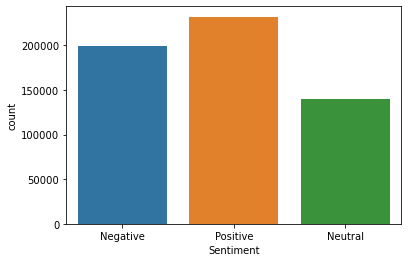

In [25]:
# Sentiment Counts
sns.countplot(tweet_data.Sentiment)

Notes: Sentiment analysis is performed using the compund evaluation methog. Each tweet is assigned with its polarity value on how much positivity, negativity and neutrlity it contains. Finally sentiment is extracted depending on thier compound value.
It can be observed that about 90% of the tweets are positive which favours the support of indian farmers which helped to revoke the farm law

In [26]:
tweet_data.to_csv(r'tweet_data_farm_law.csv', index=False)

In [47]:
#load the data
tweet_data = pd.read_csv("tweet_data_farm_law.csv", index_col=[0])
tweet_data.tail(2)

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound
Date,,,,,,,,,
2021-12-01 00:20:12+00:00,@AmandaCerny @Kisanektamorcha Thanks Amanda 🙏🏼...,2021-12-01,amanacerny kisanektamorcha thanks amana one ye...,0.1625,Positive,0.147,0.090,0.763,0.4404
2021-12-01 00:02:12+00:00,"People, stop spreading rumours no one is leavi...",2021-12-01,people stop spreaing rumours one leaving morch...,0.0,Negative,0.000,0.211,0.789,-0.6597


In [48]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572011 entries, 2020-09-29 23:52:29+00:00 to 2021-12-01 00:02:12+00:00
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Tweet        572007 non-null  object 
 1   New_Date     572005 non-null  object 
 2   Clean_Tweet  572005 non-null  object 
 3   Polarity     572005 non-null  object 
 4   Sentiment    572005 non-null  object 
 5   Positive     572005 non-null  float64
 6   Negative     572005 non-null  float64
 7   Neutral      572005 non-null  float64
 8   Compound     572003 non-null  float64
dtypes: float64(4), object(5)
memory usage: 43.6+ MB


In [49]:
#Resetting the index for the dataframe
tweet_data = tweet_data.reset_index()
#tweet_data.head(1)

In [50]:
#Drop the row which does not contains Date in Date variable
tweet_data['Date'] = pd.to_datetime(tweet_data['Date'],errors='coerce')
tweet_data.dropna(inplace=True)

In [51]:
# Creating a new column called date which contains the date of invoice only and excludes the time stamp
tweet_data['Date'] = pd.to_datetime(tweet_data['Date']).dt.date

In [52]:
#Changing the data type for Tweet from object to str 
tweet_data['Tweet'].astype(str)

0         @amitvarma Amit, You have spent many episodes ...
1         people talking about #SuhanaKhan reaction to t...
2         CNN: TRUMP is bankrupt, owes $421,000,000 to I...
3         Because that's what sets a new disappointment ...
4         3 ball(bill)... 3 strikes!!!... Farmers out \n...
                                ...                        
572006    Rihanna done more for my people than the Queen...
572007    #Pricehike \n#unemployment \n#migrantcrisis\n#...
572008    What emergency, in the midst of a #pandemic, n...
572009    @AmandaCerny @Kisanektamorcha Thanks Amanda 🙏🏼...
572010    People, stop spreading rumours no one is leavi...
Name: Tweet, Length: 572003, dtype: object

In [53]:
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound
0,2020-09-29,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma amit spent many episoes talking e-re...,0.2715909090909091,Negative,0.0,0.04,0.96,-0.2023


In [54]:
#Removing http from the cleaned tweets
tweet_data['Clean_Tweet'] = tweet_data['Clean_Tweet'].str.replace('https', '')

# 6. Visualisation

## 6.1 Word Colud

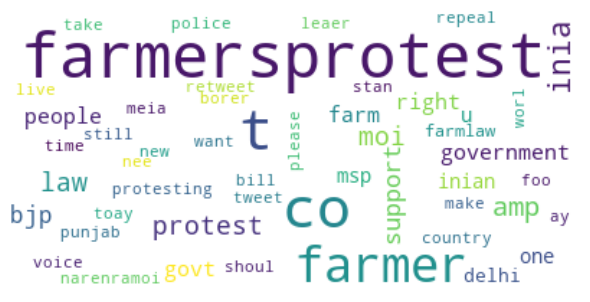

In [55]:
#Creating the text variable
cloud_text = ''.join(map(str, tweet_data.Clean_Tweet))

# Creating word_cloud with text as argument in .generate() method
def wordcloud(tweets, title):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("t")
    stopwords.add("à")
    stopwords.add("https")
    stopwords.add("ay")
    stopwords.add("_")
    
wordcloud = WordCloud(max_words=50, collocations = False, background_color = 'white').generate(cloud_text)

# Display the generated Word Cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordCloud1.png')
plt.show()

Insights: The above diagram shows the word cloud which displays the words which was frequently and mostly used during the campaign by the tweeters.

## 6.2 Word Colud with Indian Map

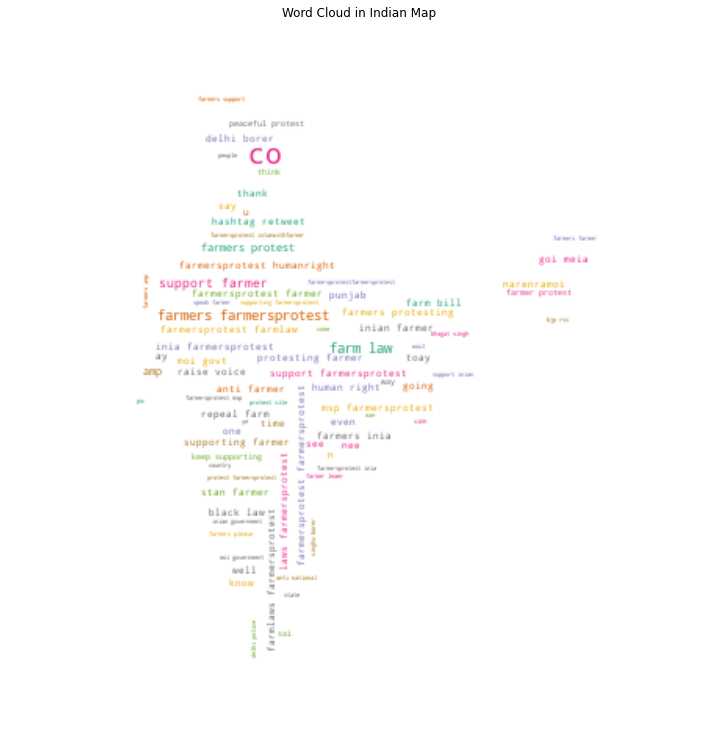

<Figure size 432x288 with 0 Axes>

In [56]:
mask = np.array(Image.open("IndianMap.png"))

#Creating the text variable
cloud_text = ''.join(map(str, tweet_data.Clean_Tweet))

def wordcloud(tweets, title):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("t")
    stopwords.add("à")
    stopwords.add("_")
    wordcloud = WordCloud(width=200, height=200, background_color="white", max_font_size=18, min_font_size=4,
                          max_words=220, stopwords=stopwords, colormap='Dark2',random_state=2018, 
                          mask=mask).generate(cloud_text)
    plt.figure(title, figsize=(20, 10), facecolor='white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.savefig('wordCloud1.png')
    plt.show()
wordcloud(tweet_data.Tweet, "Word Cloud in Indian Map")
plt.savefig('wordcloud2.png')

Insights: This depicts the Indian map with word cloud with more than 200 words which evloved in tweeter during the protest

In [57]:
#Changing the data type for date from object to date type
tweet_data['Date'] = pd.to_datetime(tweet_data['Date'])

In [58]:
#Analysis
tweet_data['Date'] = pd.to_datetime(tweet_data['Date'])
tweet_data['year'] = tweet_data['Date'].dt.year
tweet_data['month'] = tweet_data['Date'].dt.month
tweet_data['day'] = tweet_data['Date'].dt.day
tweet_data['dayofweek'] = tweet_data['Date'].dt.dayofweek
tweet_data['dayofyear'] = tweet_data['Date'].dt.dayofyear
tweet_data['date_only'] = tweet_data['Date'].dt.date
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound,year,month,day,dayofweek,dayofyear,date_only
0,2020-09-29,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma amit spent many episoes talking e-re...,0.2715909090909091,Negative,0.0,0.04,0.96,-0.2023,2020,9,29,1,273,2020-09-29


## 6.3 Month-Wise Analysis

### 6.3.1 Protest period Analysis

In [59]:
tweet_data['yyyy-mm'] = pd.to_datetime(tweet_data['date_only']).dt.strftime('%Y-%m')
tweet_data.head(1)

,Date,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound,year,month,day,dayofweek,dayofyear,date_only,yyyy-mm
0,2020-09-29,"@amitvarma Amit, You have spent many episodes ...",2020-09-29,amitvarma amit spent many episoes talking e-re...,0.2715909090909091,Negative,0.0,0.04,0.96,-0.2023,2020,9,29,1,273,2020-09-29,2020-09


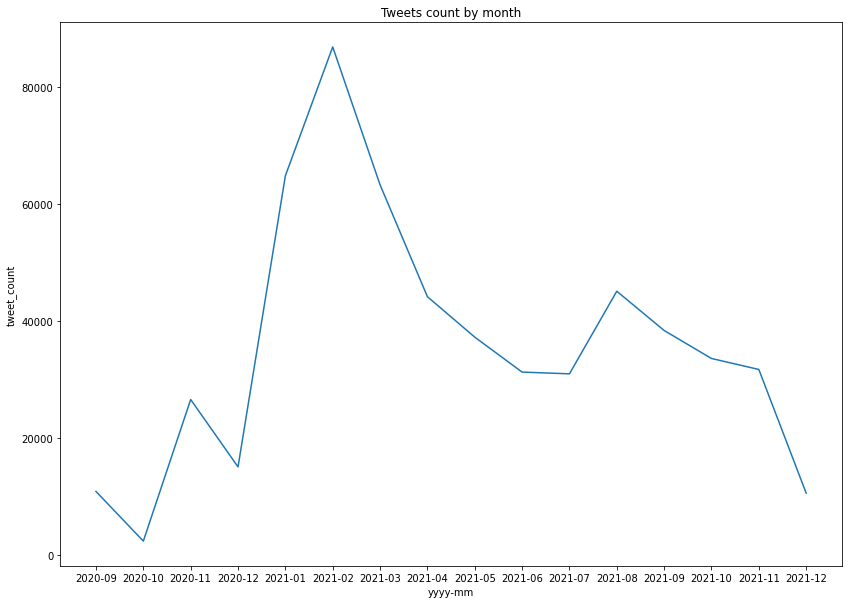

In [68]:
#Day of the week mostly tweeted
plt.figure(figsize = (14, 10))
tweets_month = tweet_data.groupby(["yyyy-mm"])["Clean_Tweet"].count().reset_index()
tweets_month.columns = ['yyyy-mm', 'tweet_count']
sns.lineplot(x = 'yyyy-mm', y = 'tweet_count', hue = None, data = tweets_month)
plt.title('Tweets count by month')
plt.savefig('Month_Analysis.png')
plt.show()

Insights: The above plot displays that there was spike in tweets during the key event choosen for this reseach. Which lies in Feburary 2021 whether the famous personality Rihanna tweeted her concern about the farmers protest

### 6.3.1 Feburary Month Analysis

In [61]:
#Filtering ony Feb
tweet_feb = tweet_data[(tweet_data['yyyy-mm'] == '2021-02')]
tweet_feb.tail(1)

,Date,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound,year,month,day,dayofweek,dayofyear,date_only,yyyy-mm
269476,2021-02-07,@Babyofsea Free this activist at once Modi. Sh...,2021-02-07,babyofsea free activist moi staning justice sp...,0.4,Positive,0.34,0.0,0.66,0.7717,2021,2,7,6,38,2021-02-07,2021-02


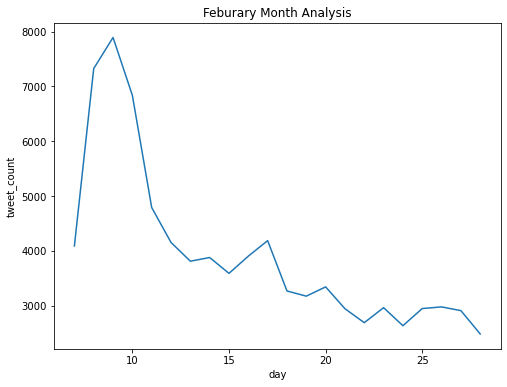

In [62]:
#Hour of the day mostly tweeted - Filter only Feb to see the trend
plt.figure(figsize = (8, 6))
tweets_feb_plot = tweet_feb.groupby(["day"])["Clean_Tweet"].count().reset_index()
tweets_feb_plot.columns = ['day', 'tweet_count']
sns.lineplot(x = 'day', y = 'tweet_count', hue = None, data = tweets_feb_plot)
plt.title('Feburary Month Analysis')
plt.savefig('Feburary_Month_Analysis.png')
plt.show()

Insights: This graphs depicts that tweets stared to emerge as soon as there was a tweet from Rihanna

### 6.3.2 Jan & Feb Month Analysis

In [63]:
#Filtering ony Jan & Feb
tweet_data_Jan_Feb = tweet_data[(tweet_data['yyyy-mm'] > '2020-12') & (tweet_data['yyyy-mm'] < '2021-03')]
tweet_data_Jan_Feb.tail(1)

,Date,Tweet,New_Date,Clean_Tweet,Polarity,Sentiment,Positive,Negative,Neutral,Compound,year,month,day,dayofweek,dayofyear,date_only,yyyy-mm
269476,2021-02-07,@Babyofsea Free this activist at once Modi. Sh...,2021-02-07,babyofsea free activist moi staning justice sp...,0.4,Positive,0.34,0.0,0.66,0.7717,2021,2,7,6,38,2021-02-07,2021-02


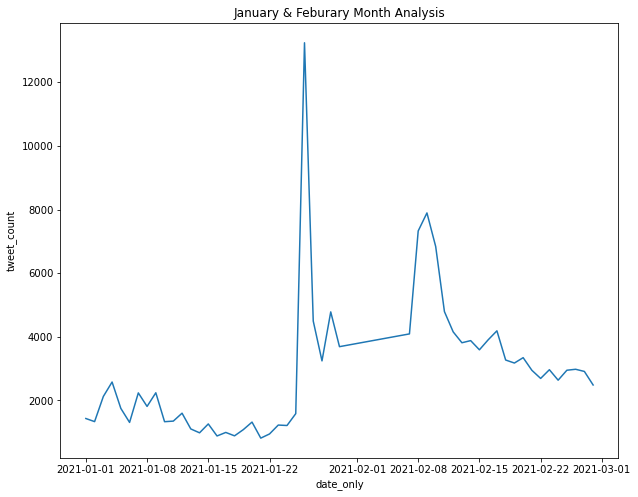

In [64]:
#Hour of the day mostly tweeted - Filter only Feb to see the trend
plt.figure(figsize = (10, 8))
tweet_data_Jan_Feb_plot = tweet_data_Jan_Feb.groupby(["date_only"])["Clean_Tweet"].count().reset_index()
tweet_data_Jan_Feb_plot.columns = ['date_only', 'tweet_count']
sns.lineplot(x = 'date_only', y = 'tweet_count', hue = None, data = tweet_data_Jan_Feb_plot)
plt.title('January & Feburary Month Analysis')
plt.show()

In [ ]:
Insights: Jan 26th start -  
    Feb 2nd - 

References:
    
#https://thavabalanarivan199.medium.com/sentiment-analysis-for-farmers-protest-in-india-using-python-c66fd4fe6a7a
#https://thecleverprogrammer.com/2021/11/24/add-labels-to-a-dataset-for-sentiment-analysis/
#https://www.youtube.com/watch?v=uPKnSq6TaAk
#https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
#https://medium.com/simplifying-data-science/word-cloud-generation-in-python-a01c5bd0a3db
#https://www.kaggle.com/code/anmolkumar/coronavirus-covid-19-tweets-word-clouds/notebook